In [6]:
# evaluate logistic regression on data on musical elements and respective genre
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
# define the location of the dataset
path = ('archive/Data/features_3_sec.csv')

#creating dataframe
df = read_csv('features_3_sec.csv')

# separatine the training set from the data
X = df.iloc[:, df.columns != "label"].drop(['filename','length'], axis=1)

#perform scaling
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = np.ravel(df.iloc[:, df.columns == "label"]) #target

#setup for fitting, do label encoding (transform non-numerical labels into numerical labels)
label_encoder = LabelEncoder()
label_encoder.fit(y)
label_encoder.transform(y)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# further split the data set to create valid set
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test,test_size=0.50, random_state=1)

# define the model
model = LogisticRegression(solver='lbfgs', C=9.0, max_iter=10000)

# fit on the training set
model.fit(X_train, np.ravel(y_train,order='C'), 20000)

# predict on test set
yhat = model.predict(X_test)

# predict on validation set
val_pred = model.predict(X_valid)

# evaluate the model
acc_train = model.score(X_train, y_train)
acc_val = accuracy_score(y_valid, val_pred)
acc_test = accuracy_score(y_test, yhat)
print('Accuracy on train set: %.2f' % (acc_train*100))
print('Accuracy on test set: %.2f' % (acc_test*100))
print('Accuracy on valid set: %.2f' % (acc_val*100))


Accuracy on train set: 74.59
Accuracy on test set: 73.06
Accuracy on valid set: 72.35


              precision    recall  f1-score   support

       blues       0.70      0.74      0.72       171
   classical       0.90      0.93      0.91       175
     country       0.70      0.66      0.68       189
       disco       0.69      0.68      0.68       163
      hiphop       0.77      0.66      0.71       161
        jazz       0.76      0.80      0.78       164
       metal       0.84      0.83      0.83       174
         pop       0.80      0.80      0.80       158
      reggae       0.64      0.67      0.66       160
        rock       0.46      0.50      0.48       133

    accuracy                           0.73      1648
   macro avg       0.73      0.73      0.73      1648
weighted avg       0.73      0.73      0.73      1648



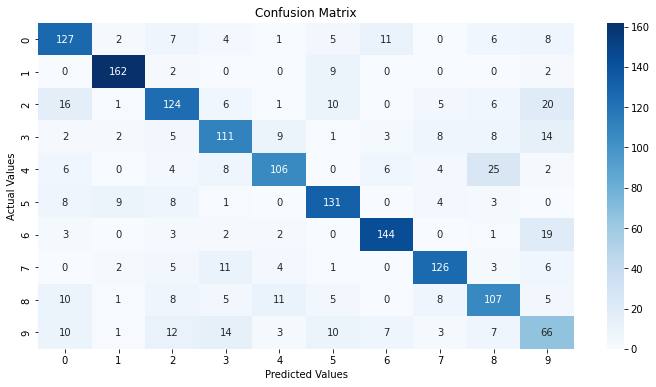

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

print(classification_report(y_test, yhat))

cm=confusion_matrix(y_test,yhat)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')